In [1]:
import missingno as msno
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np, statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
import seaborn 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LinearRegression,Ridge, RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

pd.set_option('future.no_silent_downcasting', True)

allowed_nans = ['', 'NA']
df = pd.read_csv("C:\\Users\\Lynh\\OneDrive\\Desktop\\School\\Masters\\Term 5\Capstone\\student_depression_dataset.csv", na_values=allowed_nans, keep_default_na=False)
df.head(5)

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [2]:
df.shape

(27901, 18)

In [3]:
#counts dupes. there are 27901 False which means there are no dupes.
print(df.duplicated().value_counts())

False    27901
Name: count, dtype: int64


In [4]:
#sum of nulls
df.isnull().sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [5]:
#info of table
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [6]:
res = list(dict.fromkeys(df['Gender']))
print('Gender: ', res)

Gender:  ['Male', 'Female']


In [7]:
res = list(dict.fromkeys(df['Age']))
sort = sorted(res)
print('Age: ', sort)

Age:  [18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 41.0, 42.0, 43.0, 44.0, 46.0, 48.0, 49.0, 51.0, 54.0, 56.0, 58.0, 59.0]


In [8]:
res = list(dict.fromkeys(df['Profession']))
print('Profession: ', res)

Profession:  ['Student', "'Civil Engineer'", 'Architect', "'UX/UI Designer'", "'Digital Marketer'", "'Content Writer'", "'Educational Consultant'", 'Teacher', 'Manager', 'Chef', 'Doctor', 'Lawyer', 'Entrepreneur', 'Pharmacist']


In [9]:
res = list(dict.fromkeys(df['Academic Pressure']))
print('Academic Pressure: ', res)

Academic Pressure:  [5.0, 2.0, 3.0, 4.0, 1.0, 0.0]


In [10]:
res = list(dict.fromkeys(df['Work Pressure']))
print('Work Pressure: ', res)

Work Pressure:  [0.0, 5.0, 2.0]


In [11]:
res = list(dict.fromkeys(df['Study Satisfaction']))
print('Study Satisfaction: ', res)

Study Satisfaction:  [2.0, 5.0, 3.0, 4.0, 1.0, 0.0]


In [12]:
res = list(dict.fromkeys(df['Job Satisfaction']))
print('Job Satisfaction: ', res)

Job Satisfaction:  [0.0, 3.0, 4.0, 2.0, 1.0]


In [13]:
res = list(dict.fromkeys(df['Sleep Duration']))
print('Sleep Duration: ', res)

Sleep Duration:  ["'5-6 hours'", "'Less than 5 hours'", "'7-8 hours'", "'More than 8 hours'", 'Others']


In [14]:
res = list(dict.fromkeys(df['Dietary Habits']))
print('Dietary Habits: ', res)

Dietary Habits:  ['Healthy', 'Moderate', 'Unhealthy', 'Others']


In [15]:
res = list(dict.fromkeys(df['Degree']))
sort = sorted(res)
print('Degree: ', sort)

Degree:  ["'Class 12'", 'B.Arch', 'B.Com', 'B.Ed', 'B.Pharm', 'B.Tech', 'BA', 'BBA', 'BCA', 'BE', 'BHM', 'BSc', 'LLB', 'LLM', 'M.Com', 'M.Ed', 'M.Pharm', 'M.Tech', 'MA', 'MBA', 'MBBS', 'MCA', 'MD', 'ME', 'MHM', 'MSc', 'Others', 'PhD']


In [16]:
res = list(dict.fromkeys(df['Work/Study Hours']))
print('Work/Study Hours: ', res)

Work/Study Hours:  [3.0, 9.0, 4.0, 1.0, 0.0, 12.0, 2.0, 11.0, 10.0, 6.0, 8.0, 5.0, 7.0]


In [17]:
res = list(dict.fromkeys(df['Financial Stress']))
print('Financial Stress: ', res)

Financial Stress:  ['1.0', '2.0', '5.0', '3.0', '4.0', '?']


In [18]:
df.loc[df['Financial Stress'] == '?', 'Financial Stress'] = 0

In [19]:
df = df.astype({'Financial Stress': float}) #convert to column to float. it was initially string because of the '?' value
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [20]:
res = list(dict.fromkeys(df['Family History of Mental Illness']))
print('Family History of Mental Illness: ', res)

Family History of Mental Illness:  ['No', 'Yes']


In [21]:
#drop variables that are not a part of the research
df=df.drop(['id', 'City', 'CGPA', 'Have you ever had suicidal thoughts ?'], axis=1)
df.head()

,Gender,Age,Profession,Academic Pressure,Work Pressure,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,Student,5.0,0.0,2.0,0.0,'5-6 hours',Healthy,B.Pharm,3.0,1.0,No,1
1,Female,24.0,Student,2.0,0.0,5.0,0.0,'5-6 hours',Moderate,BSc,3.0,2.0,Yes,0
2,Male,31.0,Student,3.0,0.0,5.0,0.0,'Less than 5 hours',Healthy,BA,9.0,1.0,Yes,0
3,Female,28.0,Student,3.0,0.0,2.0,0.0,'7-8 hours',Moderate,BCA,4.0,5.0,Yes,1
4,Female,25.0,Student,4.0,0.0,3.0,0.0,'5-6 hours',Moderate,M.Tech,1.0,1.0,No,0


In [22]:
#data encoding for cat-binary columns
bin_cols =['Family History of Mental Illness']
bin_dict = {'No':0, 'Yes':1}
for col in bin_cols:
    df[col] = df[col].replace(bin_dict)

bin_cols2 = ['Gender']
bin_dict2 = {'Male': 0, 'Female': 1}
for col2 in bin_cols2:
    df[col2] = df[col2].replace(bin_dict2)
    
print(df.head())

  Gender   Age Profession  Academic Pressure  Work Pressure  \
0      0  33.0    Student                5.0            0.0   
1      1  24.0    Student                2.0            0.0   
2      0  31.0    Student                3.0            0.0   
3      1  28.0    Student                3.0            0.0   
4      1  25.0    Student                4.0            0.0   

   Study Satisfaction  Job Satisfaction       Sleep Duration Dietary Habits  \
0                 2.0               0.0          '5-6 hours'        Healthy   
1                 5.0               0.0          '5-6 hours'       Moderate   
2                 5.0               0.0  'Less than 5 hours'        Healthy   
3                 2.0               0.0          '7-8 hours'       Moderate   
4                 3.0               0.0          '5-6 hours'       Moderate   

    Degree  Work/Study Hours  Financial Stress  \
0  B.Pharm               3.0               1.0   
1      BSc               3.0               2.0

In [23]:
#categorize by age range
def age_range(df):
    if df['Age'] >= 18.0 and df['Age'] <= 29.0: #age range 18-29
        return 0
    elif df['Age'] >= 30.0 and df['Age'] <= 39.0: #age range 30-39
        return 1
    elif df['Age'] >= 40.0 and df['Age'] <= 49.0: #age range 40-49
        return 2
    else:
        return 3

df['Age_Range'] = df.apply(age_range, axis = 1)

In [24]:
#drop Age
df=df.drop(['Age'], axis=1)
df.head()

,Gender,Profession,Academic Pressure,Work Pressure,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Age_Range
0,0,Student,5.0,0.0,2.0,0.0,'5-6 hours',Healthy,B.Pharm,3.0,1.0,0,1,1
1,1,Student,2.0,0.0,5.0,0.0,'5-6 hours',Moderate,BSc,3.0,2.0,1,0,0
2,0,Student,3.0,0.0,5.0,0.0,'Less than 5 hours',Healthy,BA,9.0,1.0,1,0,1
3,1,Student,3.0,0.0,2.0,0.0,'7-8 hours',Moderate,BCA,4.0,5.0,1,1,0
4,1,Student,4.0,0.0,3.0,0.0,'5-6 hours',Moderate,M.Tech,1.0,1.0,0,0,0


In [25]:
#categorize by degree type
def degree_type(df):
    if df['Degree'] == 'Class 12': #high school
        return 0
    elif df['Degree'] in ('B.Arch', 'B.Com', 'B.Ed', 'B.Pharm', 'B.Tech', 'BA', 'BBA', 'BCA', 'BE', 'BHM', 'BSc', 'LLB'): #bachelors
        return 1
    elif df['Degree'] in ('LLM', 'M.Com', 'M.Ed', 'M.Pharm', 'M.Tech', 'MA', 'MBA', 'MBBS', 'MCA', 'ME', 'MHM'): #masters
        return 2
    elif df['Degree'] in ('MD', 'PhD'): #doctorates
        return 3
    else: #others
        return 4

df['Degree_Type'] = df.apply(degree_type, axis = 1)

In [26]:
#drop Degree
df=df.drop(['Degree'], axis=1)
df.head()

,Gender,Profession,Academic Pressure,Work Pressure,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Age_Range,Degree_Type
0,0,Student,5.0,0.0,2.0,0.0,'5-6 hours',Healthy,3.0,1.0,0,1,1,1
1,1,Student,2.0,0.0,5.0,0.0,'5-6 hours',Moderate,3.0,2.0,1,0,0,1
2,0,Student,3.0,0.0,5.0,0.0,'Less than 5 hours',Healthy,9.0,1.0,1,0,1,1
3,1,Student,3.0,0.0,2.0,0.0,'7-8 hours',Moderate,4.0,5.0,1,1,0,1
4,1,Student,4.0,0.0,3.0,0.0,'5-6 hours',Moderate,1.0,1.0,0,0,0,2


In [27]:
#encoding categorical variables, drop_first true to avoid multicollinearity
df = pd.get_dummies(df, columns = ['Profession', 'Dietary Habits', 'Sleep Duration'], drop_first = True)
df.replace({False:0, True:1}, inplace=True)
df.head()

,Gender,Academic Pressure,Work Pressure,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Age_Range,...,Profession_Pharmacist,Profession_Student,Profession_Teacher,Dietary Habits_Moderate,Dietary Habits_Others,Dietary Habits_Unhealthy,Sleep Duration_'7-8 hours',Sleep Duration_'Less than 5 hours',Sleep Duration_'More than 8 hours',Sleep Duration_Others
0,0,5.0,0.0,2.0,0.0,3.0,1.0,0,1,1,...,0,1,0,0,0,0,0,0,0,0
1,1,2.0,0.0,5.0,0.0,3.0,2.0,1,0,0,...,0,1,0,1,0,0,0,0,0,0
2,0,3.0,0.0,5.0,0.0,9.0,1.0,1,0,1,...,0,1,0,0,0,0,0,1,0,0
3,1,3.0,0.0,2.0,0.0,4.0,5.0,1,1,0,...,0,1,0,1,0,0,1,0,0,0
4,1,4.0,0.0,3.0,0.0,1.0,1.0,0,0,0,...,0,1,0,1,0,0,0,0,0,0


In [28]:
#save prepared dataset to CSV
#df.to_csv(r'C:\\Users\Lynh\OneDrive\Desktop\School\Masters\Term 5\Capstone\capstone_prepared_dataset.csv')

In [29]:
print(df.columns)

Index(['Gender', 'Academic Pressure', 'Work Pressure', 'Study Satisfaction',
       'Job Satisfaction', 'Work/Study Hours', 'Financial Stress',
       'Family History of Mental Illness', 'Depression', 'Age_Range',
       'Degree_Type', 'Profession_'Content Writer'',
       'Profession_'Digital Marketer'', 'Profession_'Educational Consultant'',
       'Profession_'UX/UI Designer'', 'Profession_Architect',
       'Profession_Chef', 'Profession_Doctor', 'Profession_Entrepreneur',
       'Profession_Lawyer', 'Profession_Manager', 'Profession_Pharmacist',
       'Profession_Student', 'Profession_Teacher', 'Dietary Habits_Moderate',
       'Dietary Habits_Others', 'Dietary Habits_Unhealthy',
       'Sleep Duration_'7-8 hours'', 'Sleep Duration_'Less than 5 hours'',
       'Sleep Duration_'More than 8 hours'', 'Sleep Duration_Others'],
      dtype='object')


In [30]:
#VIF before fitting for regression model
x=df[['Gender', 'Academic Pressure', 'Work Pressure', 'Study Satisfaction',
       'Job Satisfaction', 'Work/Study Hours', 'Financial Stress',
       'Family History of Mental Illness', 'Depression', 'Age_Range',
       'Degree_Type', "Profession_'Content Writer'",
       "Profession_'Digital Marketer'", "Profession_'Educational Consultant'",
       "Profession_'UX/UI Designer'", 'Profession_Architect',
       'Profession_Chef', 'Profession_Doctor', 'Profession_Entrepreneur',
       'Profession_Lawyer', 'Profession_Manager', 'Profession_Pharmacist',
       'Profession_Student', 'Profession_Teacher', 'Dietary Habits_Moderate',
       'Dietary Habits_Others', 'Dietary Habits_Unhealthy',
       "Sleep Duration_'7-8 hours'", "Sleep Duration_'Less than 5 hours'",
       "Sleep Duration_'More than 8 hours'", 'Sleep Duration_Others']]
x = x.apply(pd.to_numeric, errors='coerce')
y=df['Depression']
vif_data = pd.DataFrame()
vif_data['Variable'] = x.columns
vif_data['VIF'] = [variance_inflation_factor(x.values, i)
                   for i in range(len(x.columns))]
print(vif_data)

                               Variable        VIF
0                                Gender   1.807339
1                     Academic Pressure   8.009824
2                         Work Pressure   2.463627
3                    Study Satisfaction   5.883014
4                      Job Satisfaction   2.464673
5                      Work/Study Hours   4.954619
6                      Financial Stress   6.665752
7      Family History of Mental Illness   1.946052
8                            Depression   3.973192
9                             Age_Range   1.446312
10                          Degree_Type   4.062021
11          Profession_'Content Writer'   1.002692
12        Profession_'Digital Marketer'   1.004070
13  Profession_'Educational Consultant'   1.001677
14          Profession_'UX/UI Designer'   1.001616
15                 Profession_Architect   1.010545
16                      Profession_Chef   1.002806
17                    Profession_Doctor   1.002490
18              Profession_Entr

In [31]:
#X and y values
X = df[['Gender', 'Academic Pressure', 'Work Pressure', 'Study Satisfaction',
       'Job Satisfaction', 'Work/Study Hours', 'Financial Stress',
       'Family History of Mental Illness', 'Depression', 'Age_Range',
       'Degree_Type', "Profession_'Content Writer'",
       "Profession_'Digital Marketer'", "Profession_'Educational Consultant'",
       "Profession_'UX/UI Designer'", 'Profession_Architect',
       'Profession_Chef', 'Profession_Doctor', 'Profession_Entrepreneur',
       'Profession_Lawyer', 'Profession_Manager', 'Profession_Pharmacist',
       'Profession_Student', 'Profession_Teacher', 'Dietary Habits_Moderate',
       'Dietary Habits_Others', 'Dietary Habits_Unhealthy',
       "Sleep Duration_'7-8 hours'", "Sleep Duration_'Less than 5 hours'",
       "Sleep Duration_'More than 8 hours'", 'Sleep Duration_Others']].values
features= df.columns[0:31]
target = df.columns[-1]

#split into test and training 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

print("The dimension of X_train is {}".format(X_train.shape))
print("The dimension of X_test is {}".format(X_test.shape))

#Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

The dimension of X_train is (22320, 31)
The dimension of X_test is (5581, 31)


In [32]:
#lr Model
lr = LinearRegression()
lr.fit(X_train, y_train)
#train and test score for linear regression
train_score_lr = lr.score(X_train, y_train)
test_score_lr = lr.score(X_test, y_test)
#print scores
print("Linear Regression Model............................................\n")
print("The train score for lr model is {}".format(train_score_lr))
print("The test score for lr model is {}".format(test_score_lr))


#Ridge Regression Model
ridgeReg = Ridge(alpha=10)
ridgeReg.fit(X_train,y_train)
#train and test scorefor ridge regression
train_score_ridge = ridgeReg.score(X_train, y_train)
test_score_ridge = ridgeReg.score(X_test, y_test)
#print scores
print("\nRidge Model............................................\n")
print("The train score for ridge model is {}".format(train_score_ridge))
print("The test score for ridge model is {}".format(test_score_ridge))

Linear Regression Model............................................

The train score for lr model is 1.0
The test score for lr model is 1.0

Ridge Model............................................

The train score for ridge model is 0.9999996694044905
The test score for ridge model is 0.9999996657910347


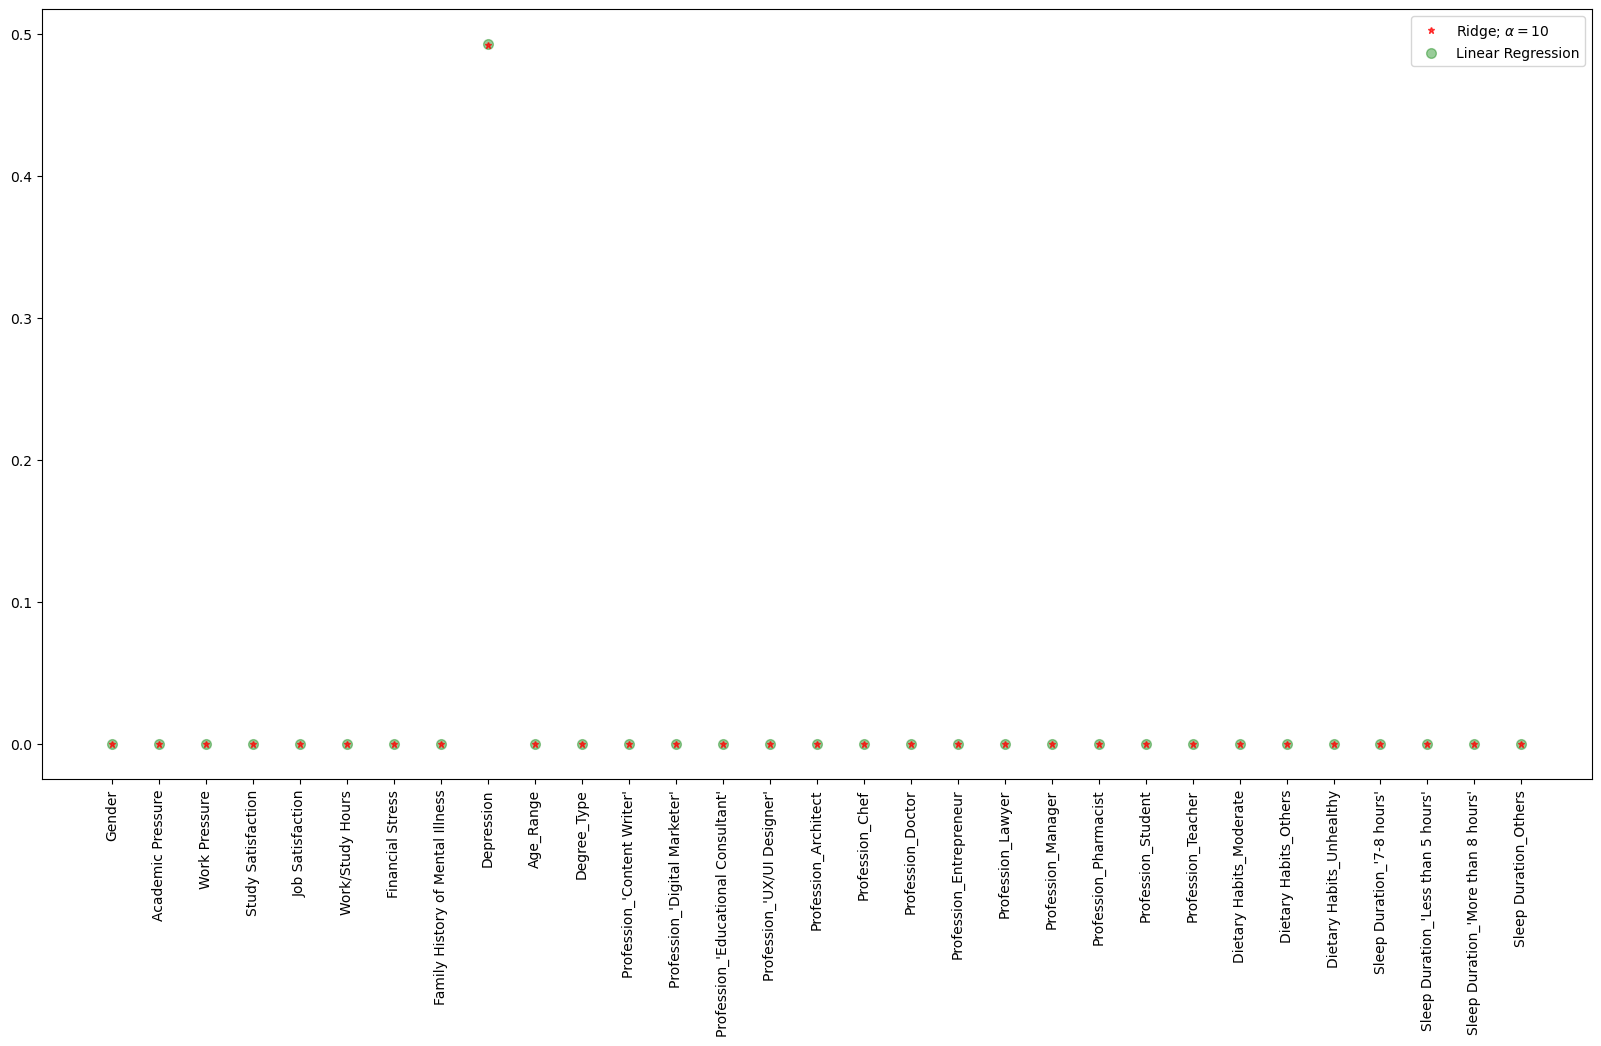

In [33]:
plt.figure(figsize = (20, 10))
plt.plot(features,ridgeReg.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 10$',zorder=7)
#plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$')
plt.plot(features,lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xticks(rotation = 90)
plt.legend()
plt.show()


In [34]:
#initial multiple linear regression
label = "Depression"
y = df['Depression']
x=df.drop(columns='Depression')
x = sm.add_constant(x)
x = x.astype(float)

model = sm.OLS(y,x.astype(int))
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             Depression   R-squared:                       0.393
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     601.0
Date:                Thu, 04 Dec 2025   Prob (F-statistic):               0.00
Time:                        15:44:39   Log-Likelihood:                -12876.
No. Observations:               27901   AIC:                         2.581e+04
Df Residuals:                   27870   BIC:                         2.607e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [35]:
#residual standard error calc - initial 
model=sm.OLS(y,x).fit()
residuals = model.resid
n = len(residuals)
p = x.shape[1]
ssr = np.sum(residuals**2)
rse = np.sqrt(ssr / (n - p))

print(f"Residual Standard Error: {rse:.4f}")

Residual Standard Error: 0.3841


In [36]:
#reduced linear regression
def significant_variables(x, y, significant_value=0.05):
    if not isinstance(x, pd.DataFrame):
        x = pd.DataFrame(x)
    while True:
        model = sm.OLS(y, x).fit()
        p_values = model.pvalues
        max_p_value = p_values.max()
        if max_p_value > significant_value:
            p_values_series = pd.Series(p_values, index=x.columns)
            insignificant = p_values_series.idxmax()
            x = x.drop(columns=insignificant)
        else:
            break
    return x, model


x_optimized, reduced_model = significant_variables(x, y)
print(reduced_model.summary())


                            OLS Regression Results                            
Dep. Variable:             Depression   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     1385.
Date:                Thu, 04 Dec 2025   Prob (F-statistic):               0.00
Time:                        15:44:39   Log-Likelihood:                -12887.
No. Observations:               27901   AIC:                         2.580e+04
Df Residuals:                   27887   BIC:                         2.592e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [37]:
#residual standard error calc - reduced
n = len(residuals)
p = x.shape[1]
ssr = np.sum(residuals**2)
rse = np.sqrt(ssr / (n - p))

print(f"Residual Standard Error: {rse:.4f}")

Residual Standard Error: 0.3841


In [38]:
reduce = reduced_model.pvalues.index.tolist()
print(reduce)

['const', 'Academic Pressure', 'Study Satisfaction', 'Work/Study Hours', 'Financial Stress', 'Family History of Mental Illness', 'Age_Range', 'Degree_Type', 'Dietary Habits_Moderate', 'Dietary Habits_Others', 'Dietary Habits_Unhealthy', "Sleep Duration_'7-8 hours'", "Sleep Duration_'Less than 5 hours'", "Sleep Duration_'More than 8 hours'"]


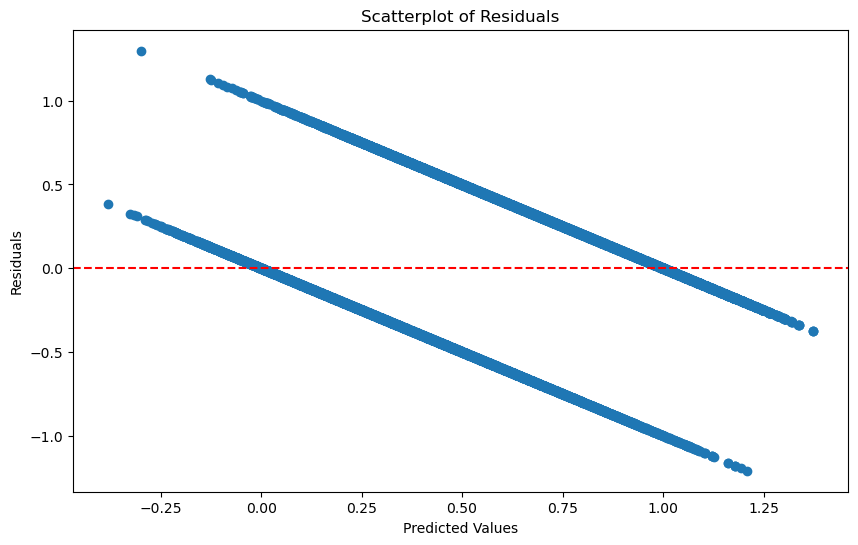

In [39]:
#scatterplot of residuals
y = df['Depression']
x = df[['Academic Pressure', 'Study Satisfaction', 'Work/Study Hours', 'Financial Stress', 
        'Family History of Mental Illness', 'Age_Range', 'Degree_Type', 'Dietary Habits_Moderate', 
        'Dietary Habits_Others', 'Dietary Habits_Unhealthy', "Sleep Duration_'7-8 hours'", 
        "Sleep Duration_'Less than 5 hours'", "Sleep Duration_'More than 8 hours'"]]
y = pd.to_numeric(df['Depression'], errors='coerce')
x = x.apply(pd.to_numeric, errors='coerce')
x = sm.add_constant(x)
model=sm.OLS(y,x).fit()
residuals = model.resid
predictions = model.fittedvalues
plt.figure(figsize=(10, 6))
plt.scatter(predictions, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Scatterplot of Residuals')
plt.show()

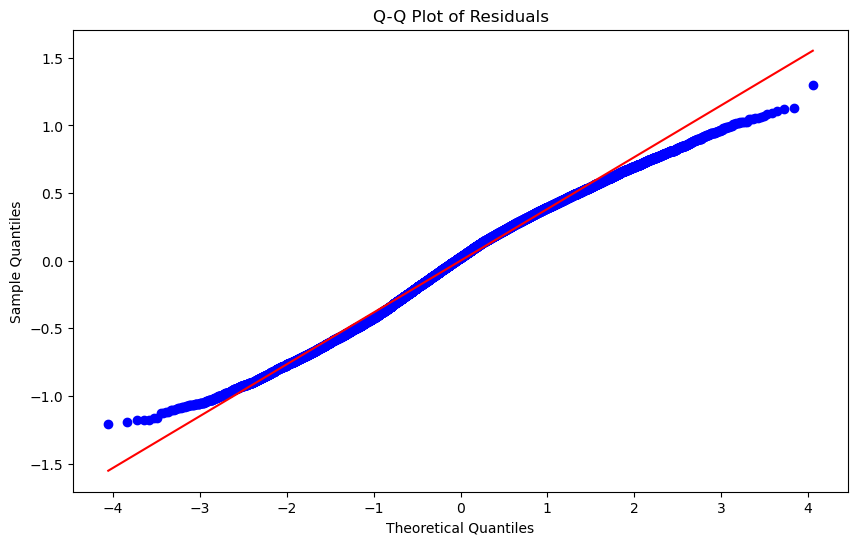

In [40]:
#Q-Q plot of residuals
plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.title('Q-Q Plot of Residuals')
plt.show()